## YOLO

### You Only Look Once: Unified, Real-Time Object Detection
https://arxiv.org/pdf/1506.02640.pdf

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Conv2D, MaxPool2D
from tensorflow.keras.utils import plot_model

<img src="images/YOLO.png" style="width=45px;height=45"/>

In [2]:
def yolo(input_shape=(448, 448, 3), n_outputs=30, weights=None):
    a = LeakyReLU(0.1)
    
    def conv_1_3(x, f1, f2, r=1):
        for _ in range(r):
            x = Conv2D(filters=f1, kernel_size=1, padding='same', activation=a)(x)
            x = Conv2D(filters=f2, kernel_size=3, padding='same', activation=a)(x)
        return x
    
  
    input = Input(input_shape)
  
    x = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation=a)(input)
    x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
  
    x = Conv2D(filters=192, kernel_size=3, padding='same', activation=a)(x)
    x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
  
    x = conv_1_3(x, 128, 256)
    x = conv_1_3(x, 256, 512)
    x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
  
    x = conv_1_3(x, 256, 512, 4)
    x = conv_1_3(x, 512, 1024)
    x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
  
    x = conv_1_3(x, 512, 1024, 2)
    x = Conv2D(filters=1024, kernel_size=3, padding='same', activation=a)(x)
    x = Conv2D(filters=1024, kernel_size=3, strides=2, padding='same', activation=a)(x)
  
    x = Conv2D(filters=1024, kernel_size=3, padding='same', activation=a)(x)
    x = Conv2D(filters=1024, kernel_size=3, padding='same', activation=a)(x)
  
    x = Dense(units=4096, activation=a)(x)
    output = Dense(n_outputs)(x)
  
    model = Model(input, output)
    
    if weights is not None:
        model.load_weights(weights, by_name=True)
    
    return model

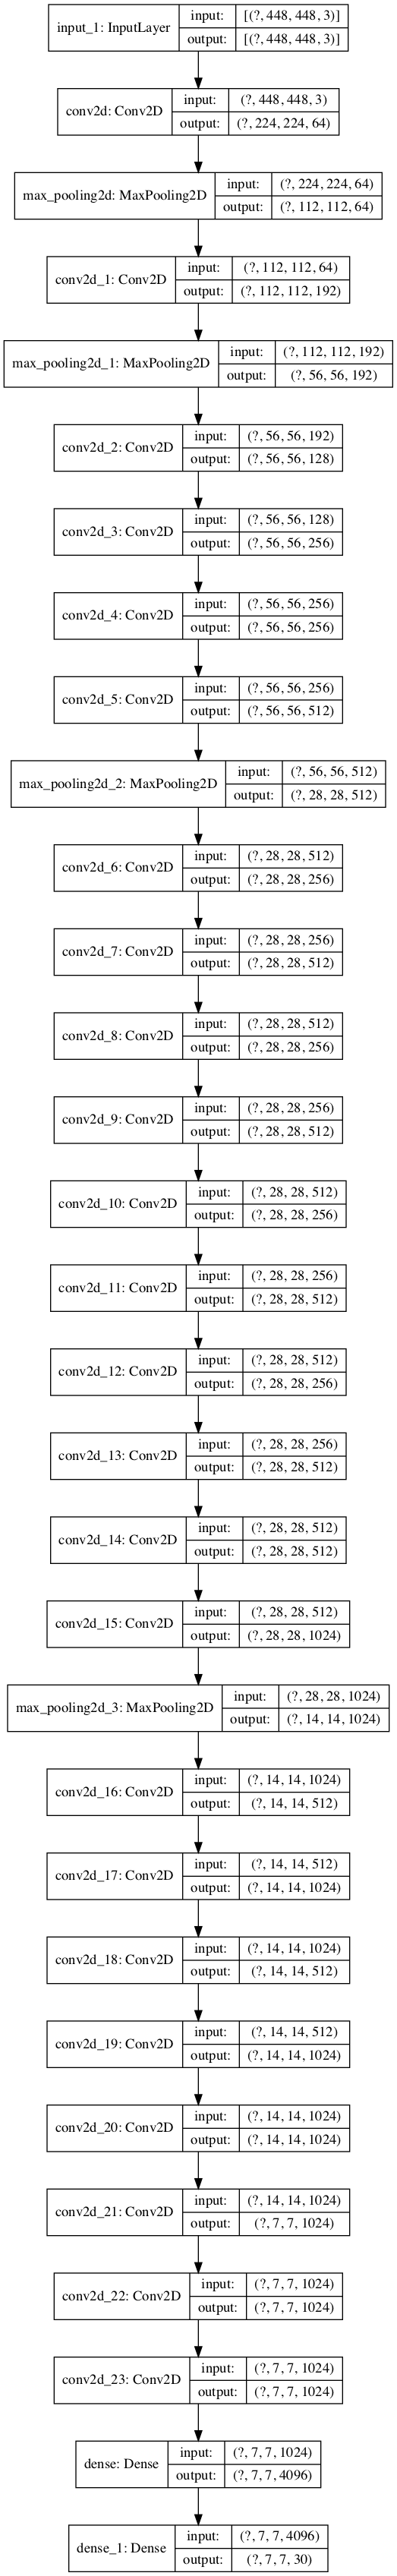

In [3]:
model = yolo()
plot_model(model, to_file='YOLOModel.png', show_shapes=True)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 448, 448, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 192)     110784    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 192)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       24704     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 256)      